# Example use of the Geometry class

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from rcsparameters.geometry.geometry import Geometry

Create a Geometry object and print the input parameters chosen in the file_input

In [2]:
file_input='data_geometry/para_RCS_LHC.txt'
RCS = Geometry(file_input)

print('Input parameters')
print('Circumference  [m]', RCS.C)
print('Injection energy [eV]',RCS.E_inj)
print('Extraction energy [eV]',RCS.E_ext)
print('Length of the straight section  [m]',RCS.LSSS) 
print('Dipole spacing  [m]', RCS.dipole_spacing) 
print('Number of arcs',RCS.nb_arc)
print('Number of insertion',RCS.nb_RF_section)
print('Number of cells per arc',RCS.nb_cell_arc)
print('Dipole properties', RCS.dipoles)
print('Dipole pattern of a half-cell',RCS.pattern)
print('Filling ratio of the arcs', RCS.filling_ratio)
print('Filling ratio of the RF',RCS.filling_ratio_RF)

Load json file data_geometry/para_RCS_LHC.txt
Input parameters
Circumference  [m] 26659
Injection energy [eV] 1500000000000.0
Extraction energy [eV] 4200000000000.0
Length of the straight section  [m] 2.5
Dipole spacing  [m] 0.3
Number of arcs 26
Number of insertion 24
Number of cells per arc 19
Dipole properties {'BNC': [1.8, 'linear'], 'BSC': 16.0}
Dipole pattern of a half-cell ['BSC', 'BNC', 'BSC', 'BNC', 'BSC']
Filling ratio of the arcs 0.9
Filling ratio of the RF 0.4


See some geometric parameters computed by the class

In [3]:
print('Total arc length [m]', RCS.tot_arc_length)
print('Arc length [m]', RCS.arc_length)
print('Total insertion length [m]', RCS.tot_insertion_length)
print('Insertion length [m]', RCS.insertion_length)
print('Cell length [m]', RCS.cell_length)
print('Total length of dipole', RCS.dipole_length_tot)
print('Dipole filling factor', RCS.filling_ratio_dipole)
print('Dipole parameters', RCS.dipole_families)

print('Total trajecory excursion',np.max(RCS.extrema(RCS.t_ext)[1])-np.min(RCS.extrema(RCS.t_inj)[0]))
mask_nc=[item == 'BNC' for item in RCS.pattern]
mask_sc=[item == 'BSC' for item in RCS.pattern]
max_width_dip=RCS.extrema(RCS.t_ext)[1]-RCS.extrema(RCS.t_inj)[0]
print('Max width in SC', np.max(max_width_dip[mask_sc]))
print('Max width in NC',np.max(max_width_dip[mask_nc]))
print('Max path length difference', RCS.max_path_diff)

Total arc length [m] 23993.100000000002
Arc length [m] 922.8115384615386
Total insertion length [m] 2665.899999999998
Insertion length [m] 102.53461538461531
Cell length [m] 48.569028340080976
Total length of dipole 19452.02884128213
Dipole filling factor 0.7296608590450553
Dipole parameters {'BNC': {'B': <function Geometry.init_field_B.<locals>.<lambda> at 0x7fd4900e99e0>, 'length_half_cell': 15.909727925324049, 'tot_length': 15718.81119022016, 'nb_half_cell': 2, 'length': 7.954863962662024, 'nb_tot': 1976, 'BL': <function Geometry.calc_geo.<locals>.<lambda> at 0x7fd4900e94e0>}, 'BSC': {'B': <function Geometry.init_field_B.<locals>.<lambda> at 0x7fd4900e9580>, 'length_half_cell': 3.7785603755687958, 'tot_length': 3733.21765106197, 'nb_half_cell': 3, 'length': 1.2595201251895987, 'nb_tot': 2964, 'BL': <function Geometry.calc_geo.<locals>.<lambda> at 0x7fd4900e9300>}}
Total trajecory excursion 0.013850251793152217
Max width in SC 0.0073946741542205855
Max width in NC 0.01319319258521316

Some methods provide parameters depending on time. Note that the time is normalised between 0 and 1. 

In [4]:
t_print = 0.5
y_min, y_max,width,max_apert_noshift,max_apert=RCS.extrema(t_print)
print('Dipole angle',RCS.theta(t_print))
print('Width in dipoles', width)
print('Max apert no shift',max_apert_noshift)
print('Path length',RCS.path_length(t_print))
print('Path length tot',RCS.path_length_tot(t_print))

Dipole angle [2.11983469e-03 2.56949182e-11 2.11982992e-03 2.56949178e-11
 2.11983469e-03]
Width in dipoles [0.00266998 0.00842097 0.00033375 0.00845534 0.00266998]
Max apert no shift 0.0120950114300176
Path length 24.284547427370242
Path length tot 23993.1328582418


The method plot_traj plots the trajectory in a cell for different times. 

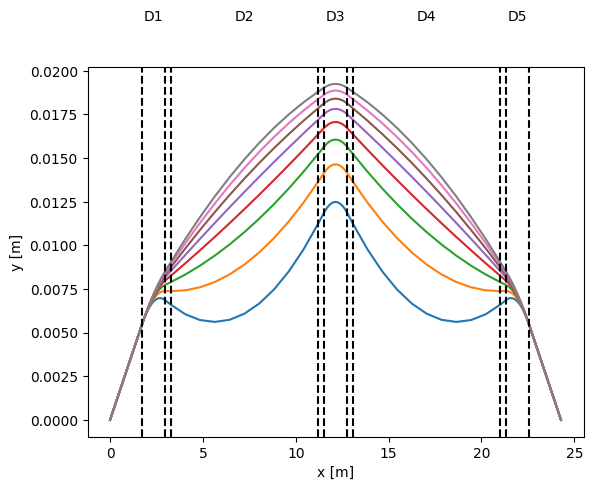

In [5]:
n_traj=8
t_traj=np.linspace(RCS.t_inj,RCS.t_ext,n_traj)
RCS.plot_traj(t_traj)

You can modify some parameters and the geometry is recomputed accordingly. In the following, the number of cells per arc is modified. The change of geometry can be observed on the cell length. If we change the pattern, we see the difference in trajectory for example. 

Initial number of cell per arc 19
Initial cell length 48.569028340080976
New number of cell per arc 22
New cell length 41.945979020979024


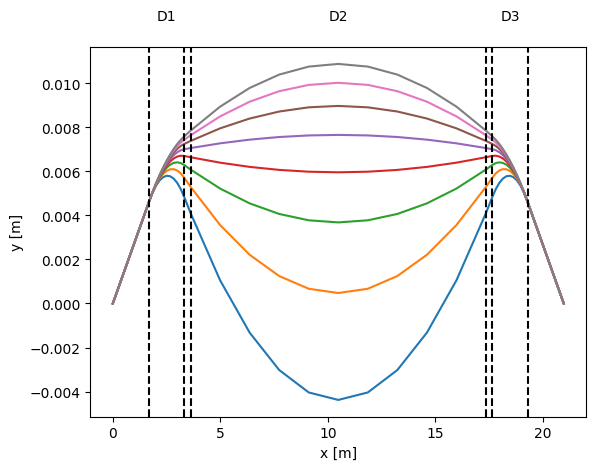

In [6]:
print('Initial number of cell per arc', RCS.nb_cell_arc)
print('Initial cell length', RCS.cell_length)
RCS.nb_cell_arc = 22
print('New number of cell per arc', RCS.nb_cell_arc)
print('New cell length', RCS.cell_length)

RCS.pattern=['BSC','BNC','BSC']
RCS.plot_traj(t_traj)

Some "physical" checks are done on the input parameters. For example, if you give a negative circumference, an error is raised.

In [7]:
RCS.C = -2

ValueError: Circumference must be > 0